In [4]:
import numpy as np
import pandas as pd
import pydicom
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from skimage.transform import resize

In [5]:
# This function reads in a .dcm file, checks the important fields for our device, and returns a numpy array
# of just the imaging data
def check_dicom(filename): 
    # todo
    
    print('Load file {} ...'.format(filename))
    ds = pydicom.dcmread(filename)
    try:
        assert(ds.BodyPartExamined == 'CHEST')
        assert(ds.Modality == 'DX')
        assert(ds.PatientPosition in ['AP', 'PA'])
    except Exception as e:
        print('File {} contains invalid data'.format(filename))
        print(e)
        return None
    img = ds.pixel_array
    # Show the image laoded from the DCM files
    plt.imshow(img, cmap = 'gray')
    
    print('Study Description:',ds.StudyDescription)
    print('Patient Age:', ds.PatientAge)
    return img
    
    
# This function takes the numpy array output by check_dicom and 
# runs the appropriate pre-processing needed for our model input
def preprocess_image(img,img_size): 
    # todo
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    new_image = img.copy()
    proc_img = (new_image - mean_intensity) / std_intensity
    proc_img = resize(img, img_size)
    return proc_img

# This function loads in our trained model w/ weights and compiles it 
def load_model(model_path, weight_path):
    # Readning the model from Json file
    with open('my_model6.json', 'r') as json_file:
        Model_Json = json_file.read()
    # Load the model architecture
    model = keras.models.model_from_json(Model_Json)
    #model.summary()
    # Load the weigths to the pre-trained model
    model.load_weights("xray_class_my_model6.best.hdf5")
     
    return model

# This function uses our device's threshold parameters to predict whether or not
# the image shows the presence of pneumonia using our trained model
def predict_image(model, img, thresh): 
    # todo    
    pred_thresold = model.predict(img,batch_size = 1, verbose = True)
    if pred_thresold[0][0] > thresh:
        prediction = 'Pneumonia'
    else:
        prediction = 'Not Pneumonia'
        
    return prediction 

Load file test1.dcm ...
Study Description: No Finding
Patient Age: 81
1/1 [==============================] - 1s 593ms/step
Not Pneumonia
Load file test2.dcm ...
Study Description: Cardiomegaly
Patient Age: 58
1/1 [==============================] - 1s 530ms/step
Not Pneumonia
Load file test3.dcm ...
Study Description: Effusion
Patient Age: 77
1/1 [==============================] - 1s 515ms/step
Not Pneumonia
Load file test4.dcm ...
File test4.dcm contains invalid data

Load file test5.dcm ...
File test5.dcm contains invalid data

Load file test6.dcm ...
File test6.dcm contains invalid data



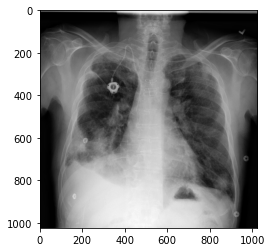

In [6]:
test_dicoms = ['test1.dcm','test2.dcm','test3.dcm','test4.dcm','test5.dcm','test6.dcm']

model_path = 'my_model6.json'
weight_path = 'xray_class_my_model6.best.hdf5'

IMG_SIZE=(1,224,224,3) # This might be different if you did not use vgg16
img_mean = 0 # loads the mean image value they used during training preprocessing
img_std  = 0 # loads the std dev image value they used during training preprocessing

my_model = load_model(model_path, weight_path)
thresh = 0.6 #loads the threshold they chose for model classification 

#dcm1 = pydicom.dcmread(test_dicoms[5])
#print(dcm1)
# use the .dcm files to test your prediction
for i in test_dicoms:
    
    img = np.array([])
    img = check_dicom(i)
    
    if img is None:
        continue
        
    img_proc = preprocess_image(img,IMG_SIZE)
    #plt.imshow(img_proc)
    pred= predict_image(my_model,img_proc,thresh)
    print(pred)